In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Различия методов дифференцирования

Многие законы природы сформулированы с использованием производных. Далеко не всегда эти производные можно посчитать аналитически. В задачах численного моделирования функции заданные на областях в $\mathbb R^d$ приходится приближать неким подмножеством функций, образующих конечномерное пространство, так как в компьютере можно хранить только конечное количество коэффициентов. Зная такую приближенную функцию возникает вопрос, как можно оценить производную приближаемой функции наиболее точно? В простейшем случае функция $f:\mathbb R\to\mathbb R$ задана своими значениями $f(x)$ и $f(x+h)$ на паре точек $x$ и $x+h$, прочие же значения приближенно получаются тем или иным способом интерполяции. Исходя из определения производной, ее можно приблизить отношением приращения функции к приращению аргумента:
$$f'(x)\approx\frac{f(x+h)-f(x)}{h}.$$
Для любого конечного приращения $h$ аргумента ответ будет получаться ошибочным, однако ошибка должна уменьшаться при приращении стремящемся к нулю $h\to 0$.
Проверим, какую минимальную погрешность можно получить в приближенной арифметике.

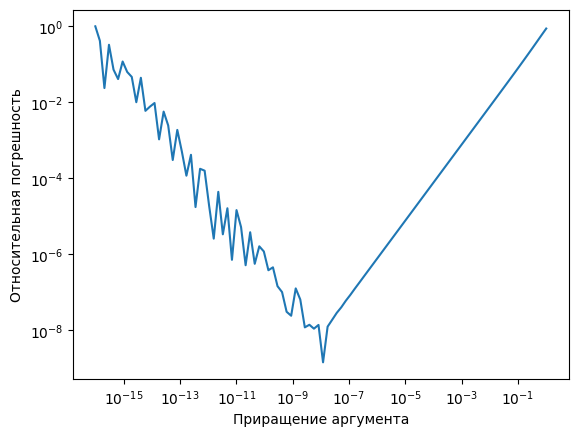

In [3]:
def f(x): return np.sin(x) # Функция 
def dfdx(x): return np.cos(x) # и ее производная.

x0 = 1 # Точка, в которой производится дифференциирование.
dx = np.logspace(-16, 0, 100) # Приращения аргумента.

# Найдем приращения функции
df = f(x0+dx)-f(x0)
# и оценим производные.
approx_dfdx = df/dx

# Вычислим точное значение производной 
exact_dfdx = dfdx(x0)
# и вычислим относительные погрешности.
relative_error = np.abs(1.0-approx_dfdx/exact_dfdx)

# Строим график зависимости погрешности от приращения.
plt.loglog(dx, relative_error)
plt.xlabel("Приращение аргумента")
plt.ylabel("Относительная погрешность")
plt.show()

Как мы видим, погрешность не стремиться к нулю, а достигает своего минимума при шагах около $10^{-8}$, затем снова растет. 

## Задание

### 1. Объясните график ошибки. Почему ошибка сначала уменьшается, но потом растет? По какому закону происходит уменьшение и рост ошибки?

В области очень малых приращений аргумента доминирует ошибка округления и хранения числа в памяти, и поэтому относительная погрешность убывает с увеличением приращения аргумента. Впрочем, начиная с некоторого значения начинает преобладать ошибка, связанная со слишком большим шагом при вычислении производной, которая определяет увеличение погрешности с ростом приращения.

$$E(h)=Ah+\frac{B}{h}$$

### 2. Для произвольной функции, оцените величину шага, при котором ошибка приближения производной минимальна. Какова минимальная ошибка такого метода приближения?

Чтобы оценить оптимальный шаг $ dx $, при котором ошибка численного дифференцирования произвольной функции минимальна, и определить минимальную ошибку такого приближения, рассмотрим как ошибку усечения, так и ошибку округления.

Для формулы прямой разности ошибка усечения пропорциональна $ dx $. Аппроксимация производной имеет вид:
$$
\frac{f(x_0 + dx) - f(x_0)}{dx} = f'(x_0) + \frac{f''(x_0)}{2} dx + O(dx^2)
$$
Таким образом, ошибка усечения составляет $ O(dx) $.

Из-за ограниченной точности арифметики с плавающей запятой ошибка округления пропорциональна $ \dfrac{\epsilon}{dx} $, где $ \epsilon $ — машинная точность. Это возникает из-за вычитания близких чисел при очень малых $ dx $.

Общая ошибка представляет собой сумму ошибки усечения и ошибки округления:
$$
E = A \cdot dx + \frac{B \cdot \epsilon}{dx}.
$$

Чтобы минимизировать $ E $, приравняем производную $ E $ по $ dx $ к нулю:
$$
\frac{dE}{dx} = A - \frac{B \cdot \epsilon}{dx^2} = 0
$$
Решая относительно $ dx $, получаем:
$$
dx = \sqrt{\frac{B \cdot \epsilon}{A}}
$$

Ошибка усечения для формулы прямой разности равна:
$$
\text{Ошибка усечения} = \frac{f''(x_0)}{2} dx.
$$
Таким образом, $A = \frac{f''(x_0)}{2}$.

Ошибка округления, вызванная ограниченной точностью арифметики, приблизительно равна:
$$
\text{Ошибка округления} = \frac{2 \epsilon |f(x_0)|}{|f'(x_0)|} \cdot \frac{1}{dx}.
$$
Следовательно, $B = \frac{2 |f(x_0)|}{|f'(x_0)|}$.

Тогда для синуса минимизация относительной ошибки достигается при
$$
dx=2\sqrt{\frac{\epsilon}{\cos{x_0}}}
$$

и это очень похоже на положение минимума на графике выше.

In [4]:
np.finfo(float).eps

np.float64(2.220446049250313e-16)

Подставляя оптимальный $dx $ обратно в выражение для ошибки:
$$
E_{\text{min}} = A \cdot \sqrt{\epsilon} + \frac{B \cdot \epsilon}{\sqrt{\epsilon}} = (A + B) \cdot \sqrt{\epsilon}
$$
Следовательно, минимальная относительная ошибка пропорциональна $ \sqrt{\epsilon} $.

### Выражение $f(x+h)-f(x)$ называется прямой конечной разностью функции $f$ в точке $x$, будем обозначать ее $\Delta_+ f$. Также часто рассматривают обратную конечную разность $\Delta_- f=f(x)-f(x-h)$ и центральную конечную разность $\Delta_0 f=f(x+\frac h2)-f(x-\frac h2)$.
Построенные по конечным разностям разделенные разности могут использоваться для оценки производной:
$$f'(x)\approx \frac{\Delta_+ f}{h}\approx \frac{\Delta_- f}{h}\approx \frac{\Delta_0 f}{h}.$$
Сравним погрешности приближений.

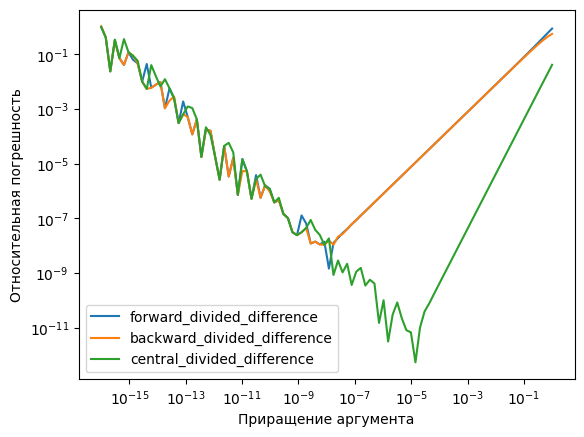

In [5]:
def experiment(method, f=np.sin, dfdx=np.cos, x0=1, dx = np.logspace(-16, 0, 100)):
    """
    Оценивает производную `f` с помощью функции `method`, сравнивает со значением аналитической 
    производной `dfdx`, и строит график относительной ошибки от приращения аргумента.
    Оценка производной производиться функцией `method(f, x0, dx)` принимающей на вход
    функцию `f`, которая дифференцруется в точке `x0`, используя приращения `dx`; 
    функция `method` возвращает вектор значений производной на всех переданных приращениях `dx`.
    """
    approx_dfdx = method(f, x0, dx) # Оценка производных.
    exact_dfdx = dfdx(x0) # Точное значение производной.
    relative_error = np.abs(1.0-approx_dfdx/exact_dfdx) # Относительные погрешности.

    plt.loglog(dx, relative_error, label=method.__name__)
    plt.xlabel("Приращение аргумента")
    plt.ylabel("Относительная погрешность")
    return relative_error

def forward_divided_difference(f, x0, dx):
    """
    Прямая разделенная разность.
    """
    return (f(x0+dx)-f(x0))/dx

def backward_divided_difference(f, x0, dx):
    """
    Обратная разделенная разность.
    """
    return (f(x0)-f(x0-dx))/dx

def central_divided_difference(f, x0, dx):
    """
    Центральная разделенная разность.
    """
    return (f(x0+dx/2)-f(x0-dx/2))/dx


# Строим график зависимости погрешности от приращения.
experiment(forward_divided_difference)
experiment(backward_divided_difference)
experiment(central_divided_difference)
plt.legend()
plt.show()

## Задание

### 3. Объясните, почему прямая и обратная разделенные разности дают одинаковую погрешность, а центральная конечная разность дает более точный ответ?

С точностью до замены $ h \to -h $, обратная разность является прямой разностью, поэтому оценка погрешности не изменится, поэтому получаемые экспериментально погрешности сходятся.

Центральная разность имеет ошибку усечения второго порядка ($O(dx^2)$). Это связано с тем, что в разложении Тейлора члены с нечётными степенями $dx$ взаимно уничтожаются:
$$
    \frac{f(x_0 + dx/2) - f(x_0 - dx/2)}{dx} = f'(x_0) + \underbrace{\frac{f'''(x_0)}{24} dx^2 + \cdots}_{O(dx^2)}.
$$
    Благодаря квадратичному порядку, ошибка усечения уменьшается быстрее при малых \(dx\). Поэтому центральная разность даёт более точный результат, чем прямая или обратная.

### 4. Для произвольной фукнции оцените скорость уменьшения ошибки для центральной конечной разности. Как зависит скорость от гладкости функции?

### 5. Какова минимальная погрешность для вычисления центральной конечной разности?

Для центральной конечной разности:

$$
f' (x) = \frac{f(x + h/2) - f(x - h/2)}{h}
$$

Разложив в ряд Тейлора, получим:

$$
f(x + h/2) - f(x - h/2) = h f' (x) + \frac{1}{2} h^2 f''' (x)\implies
\left| f' (x) - f_c (x) \right| \leq \frac{M_3}{12} h^2
$$

Учитывая погрешность исходных данных, получим аналогичную функцию оценки погрешности центральной разности:

$$
g_c (h) = \frac{M_3}{12} h^2 + \frac{2M_0}{h}
$$

Найдя экстремум этой функции, получим:

$$
h_0 = \left( \frac{M_3}{12M_0} \right)^{1/3}
$$

И минимальная погрешность будет равна:

$$
g_c (h_0) = 3 (M_0)^{2/3} \left( \frac{M_3}{12} \right)^{1/3}
$$

### В некоторых случаях известно аналитическое выражение для дифференцируемой функции, однако аналитическое выражение для производной слишком громоздко, чтобы использовать его в вычислениях. В этом случае удобно использовать метод автоматического дифференцирования. Идея метода заключается в том, что вместе со значением функции хранится значение производной функции в этой точке, т.е. все функции вычисляют пару  $(f(x), f'(x))$.
Вычисления начинают со значения $(x, 1)$ (производная $x$ по $x$ равна $1$), затем пользуются правилом дифференцирования сложной функции, например, при счете $\sin(f(x))$ уже найденные значения $f(x)$ преобразуются следующим образом:

$$(f(x),f'(x))\mapsto (\sin(f(x)),\cos(f(x))f'(x)).$$

В настоящее время существует множество пакетов для автоматического дифференцирования, например, [autograd](https://github.com/HIPS/autograd), также см. библиотеки для работы с искуственными нейронными сетями.
С педагогическими целями реализуем простой класс для автоматического дифферецирования. 

In [6]:
class AG:
    def __init__(self, v, d):
        """
        Инициализирует пару (f, df/dx) = (v, d).
        """
        self.v = v
        self.d = d
        
    # Представление констант
    @staticmethod
    def const(x):
        return AG(x, 1)
    
    # Арифметические операции
    def __add__(self, other):
        return AG(self.v+other.v, self.d+other.d)
    def __sub__(self, other):
        return AG(self.v-other.v, self.d-other.d)
    def __mul__(self, other):
        return AG(self.v*other.v, self.d*other.v+self.v*other.d)
    def __truediv__(self, other):
        return AG(self.v/other.v, (self.d*other.v-self.v*other.d)/(other.v**2) )
    
    # Возведение в степень
    def __pow__(self, other):
        return AG(np.power(self.v, other.v), np.power(self.v,other.v-1.)*other.v*self.d 
                                           + np.power(self.v,other.v)*np.log(self.v)*other.d )
    
    # Основные функции
    @staticmethod
    def sin(x):
        return AG(np.sin(x.v), np.cos(x.v)*x.d)

    @staticmethod
    def cos(x):
        return AG(np.cos(x.v), -np.sin(x.v)*x.d)
    
    @staticmethod
    def log(x):
        return AG(np.log(x.v), x.d/x.v)    

    
x = AG.const(3)
y = x*x/x
print(f"y({x.v})={y.v} y'({x.v})={y.d}")

y(3)=3.0 y'(3)=1.0


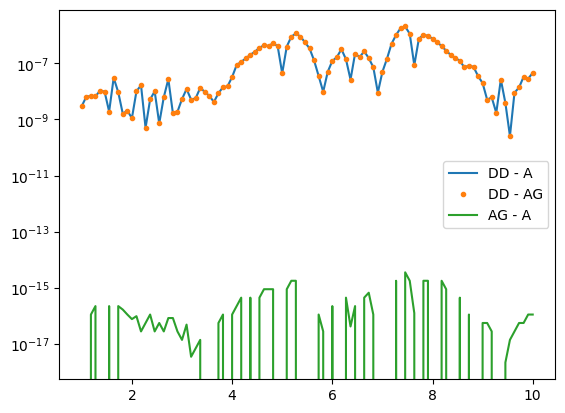

In [7]:
# Сравним автоматическое дифференцирование с другими способами счета.

# Сложная фукнция
def f(x): return x**AG.sin(x**AG.cos(x)) 

# и ее еще более сложная аналитическая производная
def dfdx(x): 
    return x**AG.sin(x**AG.cos(x))*(
        x**AG.cos(x)*AG.cos(x**AG.cos(x))*AG.log(x)*(AG.cos(x)/x - AG.log(x)*AG.sin(x)) 
        + AG.sin(x**AG.cos(x))/x
    )

# Точки для оценки производной.
x0 = np.linspace(1,10,100)

# Шаг для конечной разности.
h = 1e-8

# Оценка производной через центральную разделенную разность.
divided_difference = ( f(AG.const(x0+h/2)).v - f(AG.const(x0-h/2)).v )/h

# Аналитический ответ.
analytic = dfdx( AG.const(x0) ).v

# Автоматическое дифференцирование.
autograd = f( AG.const(x0) ).d

def abs_err(x, y):
    """Считает абсолютную ошибку."""
    return np.abs(x-y)

# Сравниваем три результата между собой.
plt.semilogy(x0, abs_err(divided_difference, analytic), label="DD - A")
plt.semilogy(x0, abs_err(divided_difference, autograd), '.', label="DD - AG")
plt.semilogy(x0, abs_err(autograd, analytic), label="AG - A")
plt.legend()
plt.show()

Приближение через конечные разности дает ожидаемо большую погрешность. Аналитическая формула и автоматичесое дифференцирование дает очень похожие, но все же отличающиеся результаты.

## Задания

### 6. Реализуйте автоматическое дифференцирование для вычисления арктангенса.

In [8]:
def arctan(x):
    value = np.arctan(x.v)                  
    derivative = (1 / (1 + x.v**2)) * x.d 
    return AG(value, derivative)

AG.arctan = arctan

x = AG.const(1)
y = AG.arctan(x)

print(f"arctan({x.v}) = {y.v}") 
print(f"Производная = {y.d}")

x = AG.const(2)
result = AG.arctan(x*x)

# Проверка
expected_derivative = (2 * 2) / (1 + (2**4))
print(f"Производная f(2): {result.d} (ожидается {expected_derivative})")

arctan(1) = 0.7853981633974483
Производная = 0.5
Производная f(2): 0.23529411764705882 (ожидается 0.23529411764705882)


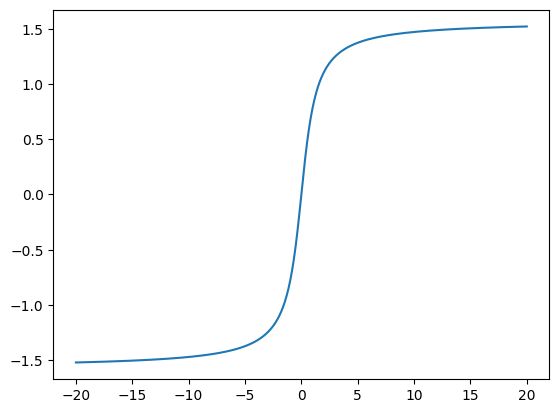

In [9]:
x = AG.const(5)
y = AG.arctan(x)
xs = np.linspace(-20, 20, 1000)
ys = []
for i in xs:
  x = AG.const(i)
  ys.append(AG.arctan(x).v)

plt.plot(xs, ys)

### 7. Реализуйте автоматическое дифферецирование для двух переменных (можно ограничиться только арифметикой).

In [10]:
class AG2:
    def __init__(self, value, gradients=None):
        """
        value: значение функции.
        gradients: словарь частных производных вида {переменная: значение}.
        Пример: AG(3, {'x': 1}) — переменная x со значением 3.
        """
        self.value = value
        self.gradients = gradients if gradients is not None else {}

    @staticmethod
    def variable(name, value):
        return AG2(value, {name: 1.0})

    @staticmethod
    def constant(value):
        return AG2(value, {})

    # Арифметические операции
    def __add__(self, other):
        # Сложение: f + g
        new_value = self.value + other.value
        new_grad = {}
        # Градиент суммы = сумма градиентов
        for var in set(self.gradients) | set(other.gradients):
            new_grad[var] = self.gradients.get(var, 0) + other.gradients.get(var, 0)
        return AG2(new_value, new_grad)

    def __mul__(self, other):
        # Умножение: f * g
        new_value = self.value * other.value
        new_grad = {}
        # Градиент произведения: df/dx * g + f * dg/dx
        for var in set(self.gradients) | set(other.gradients):
            new_grad[var] = self.gradients.get(var, 0) * other.value + self.value * other.gradients.get(var, 0)
        return AG2(new_value, new_grad)

    def __sub__(self, other):
        # Вычитание: f - g
        return self + (-1 * other)

    def __truediv__(self, other):
        # Деление: f / g = f * (1/g)
        return self * (other ** -1)

    def __pow__(self, exponent):
        # Возведение в степень: f^exponent
        if not isinstance(exponent, AG2):
            exponent = AG2.constant(exponent)
        new_value = self.value ** exponent.value
        new_grad = {}
        # Градиент: exponent * f^(exponent-1) * df/dx + f^exponent * ln(f) * dexponent/dx
        for var in set(self.gradients) | set(exponent.gradients):
            term1 = exponent.value * (self.value ** (exponent.value - 1)) * self.gradients.get(var, 0)
            term2 = (self.value ** exponent.value) * np.log(self.value) * exponent.gradients.get(var, 0)
            new_grad[var] = term1 + term2
        return AG2(new_value, new_grad)

    def __repr__(self):
        return f"AG2(value={self.value}, gradients={self.gradients})"

In [11]:
x = AG2.variable('x', 2.0)
y = AG2.variable('y', 3.0)

f = x * y + y ** AG2.constant(2)

print(f"f(x, y) = {f.value}")  # 2*3 + 3^2 = 15
print(f"df/dx = {f.gradients.get('x', 0)}")  # y = 3
print(f"df/dy = {f.gradients.get('y', 0)}")  # x + 2y = 2 + 6 = 8

f(x, y) = 15.0
df/dx = 3.0
df/dy = 8.0


In [12]:
x = AG2.variable('x', 4.0)
y = AG2.variable('y', 2.0)
f = (x ** AG2.constant(2)) / y

print(f"f(x, y) = {f.value}")          # 4^2 / 2 = 8
print(f"df/dx = {f.gradients['x']}")   # (2x)/y = 8/2 = 4
print(f"df/dy = {f.gradients['y']}")   # -x^2 / y^2 = -16/4 = -4

f(x, y) = 8.0
df/dx = 4.0
df/dy = -4.0


### 8. Какой ответ получается точнее: через автоматическое дифференцирование или через аналитическое выражение для производной, полученное через символьную алгербру (например, [Wolfram Alpha](https://www.wolframalpha.com/))? Что быстрее считается?

In [13]:
#!pip install sympy > None

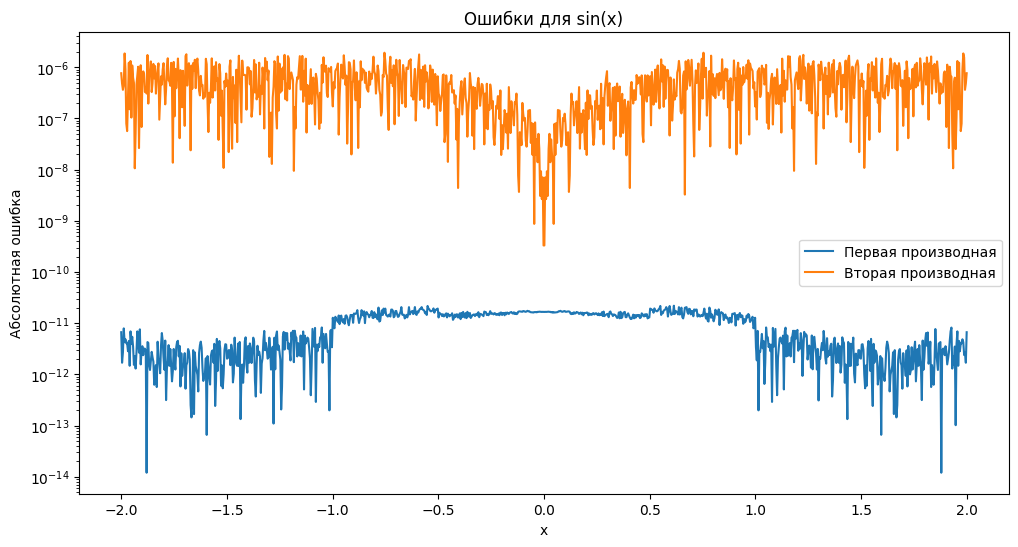

sin(x):
  Численный метод: 0.00000 сек
  Символьный метод: 0.00000 сек
----------------------------------


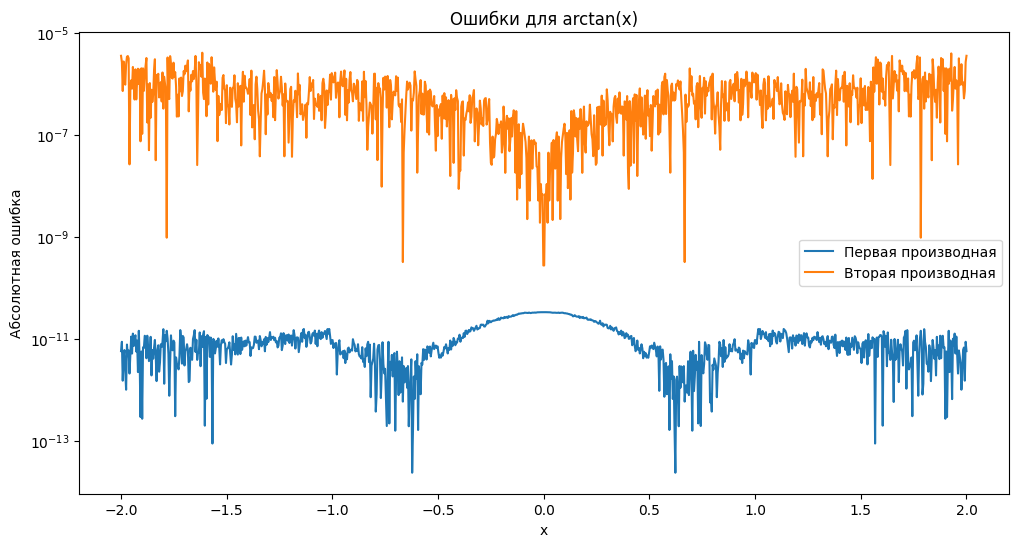

arctan(x):
  Численный метод: 0.00000 сек
  Символьный метод: 0.00000 сек
----------------------------------


In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import time

# Настройка SymPy
x = sp.symbols('x')
functions = {
    'sin(x)': sp.sin(x),
    'arctan(x)': sp.atan(x)
}

# Шаг для численного дифференцирования
h = 1e-5

# Точки для вычисления
x_vals = np.linspace(-2, 2, 1000)

for name, f_sym in functions.items():
    # Символьные производные
    f_prime_sym = sp.diff(f_sym, x)
    f_double_prime_sym = sp.diff(f_sym, x, x)
    
    # Преобразование в численные функции
    f = sp.lambdify(x, f_sym, 'numpy')
    f_prime = sp.lambdify(x, f_prime_sym, 'numpy')
    f_double_prime = sp.lambdify(x, f_double_prime_sym, 'numpy')
    
    # Численные производные
    def numerical_prime(x):
        return (f(x + h) - f(x - h)) / (2 * h)
    
    def numerical_double_prime(x):
        return (f(x + h) - 2 * f(x) + f(x - h)) / h**2
    
    # Вычисление значений
    symbolic_prime = f_prime(x_vals)
    symbolic_double_prime = f_double_prime(x_vals)
    numeric_prime = numerical_prime(x_vals)
    numeric_double_prime = numerical_double_prime(x_vals)
    
    # Ошибки
    error_prime = np.abs(symbolic_prime - numeric_prime)
    error_double_prime = np.abs(symbolic_double_prime - numeric_double_prime)
    
    # Графики ошибок
    plt.figure(figsize=(12, 6))
    plt.semilogy(x_vals, error_prime, label='Первая производная')
    plt.semilogy(x_vals, error_double_prime, label='Вторая производная')
    plt.title(f'Ошибки для {name}')
    plt.xlabel('x')
    plt.ylabel('Абсолютная ошибка')
    plt.legend()
    plt.show()
    
    # Замер времени
    start = time.time()
    _ = numerical_prime(x_vals)
    numerical_time = time.time() - start
    
    start = time.time()
    _ = f_prime(x_vals)
    symbolic_time = time.time() - start
    
    print(f"{name}:")
    print(f"  Численный метод: {numerical_time:.5f} сек")
    print(f"  Символьный метод: {symbolic_time:.5f} сек")
    print("----------------------------------")

$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}.
$$

$$
f''(x) \approx \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}.
$$

Символьное дифференцирование (SymPy) выводит точные аналитические выражения для производных.

### При решении сеточными методами дифференциальных уравнений или уравнений в частных производных функцию обычно нельзя вычислять в произвольных точках, так как она известна только в узлах решетки.
Например, функция $f(x)$ может быть задана в узлах равномерной решетки $x_k=kh$, где $h$ задает плотность решетки.
В этом случае производная должна выражаеться через значения функции в узлах $x_k$.
Например, через центральную конечную разность
$$f'(x_k) \approx \frac{f(x_{k+1})-f(x_{k-1})}{x_{k+1}-x_{k-1}}$$
или через прямую конечную разность:
$$f'(x_k) \approx \frac{f(x_{k+1})-f(x_{k})}{x_{k+1}-x_{k}}.$$
Как мы знаем, центральная конечная разность точнее, но шаг аргумента в этом случае в два раза больше.

Чтобы воспользоваться более точными оценками производной, но не увеличивать шаг интегрирования, функцию и ее производную можно задавать на разных решетках.
Например, в качестве узлов новой решетки можно выбрать точки между старыми узлами на ранвом расстоянии от соседей. 

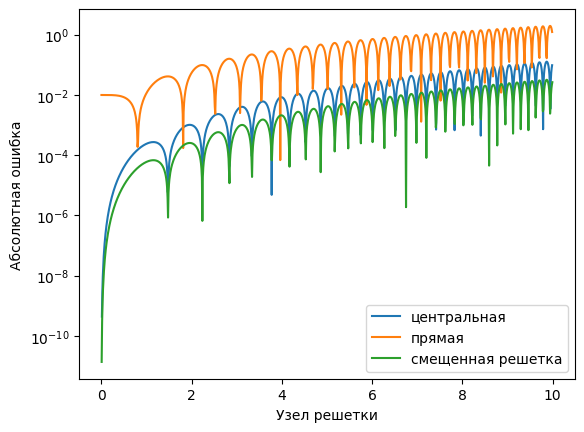

In [15]:
# Сравним погрешности прямой и центральной разделенной разности на решетке.
def f(x): return np.sin(x**2) # Функция
def dfdx(x): return 2*x*np.cos(x**2) # и ее производная

# Зададим решетку
xk = np.linspace(0,10,1000)

# Вычислим на ней функцию
fk = f(xk)

# Приближенные значения производной:
central_dfdx = np.empty_like(xk); central_dfdx[:] = np.nan
central_dfdx[1:-1] = (fk[2:]-fk[:-2])/(xk[2:]-xk[:-2])

forward_dfdx = np.empty_like(xk); forward_dfdx[:] = np.nan
forward_dfdx[:-1] = (fk[1:]-fk[:-1])/(xk[1:]-xk[:-1])


# Точные значения производной
exact_dfdx = dfdx(xk)

yk = (xk[1:]+xk[:-1])/2 # Смещенная решетка.
shifted_dfdx = (fk[1:]-fk[:-1])/(xk[1:]-xk[:-1]) # Оценка центральной разделенной разностью.
exact_shifted = dfdx(yk) # Точные значения на смещенной решетке

plt.semilogy(xk, abs_err(central_dfdx, exact_dfdx), label="центральная")
plt.semilogy(xk, abs_err(forward_dfdx, exact_dfdx), label="прямая")
plt.semilogy(yk, abs_err(shifted_dfdx, exact_shifted), label="смещенная решетка")
plt.xlabel("Узел решетки")
plt.ylabel("Абсолютная ошибка")
plt.legend()
plt.show()

## Задание

### 9. Объясните различия в точностях приближения центральной и прямой разделенными разностями.

При численном дифференцировании на равномерной сетке точность методов зависит от порядка аппроксимации и шага сетки $h$.

#### Порядок аппроксимации

- Прямая разделённая разность:
  $$
  f'(x_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}.
  $$
  Ошибка усечения: $O(h)$. Использует только два соседних узла, что ограничивает точность.

- Центральная разделённая разность:
  $$
  f'(x_k) \approx \frac{f(x_{k+1}) - f(x_{k-1})}{2h}.
  $$
  Ошибка усечения: $O(h^2)$. Использует симметричные узлы, что повышает порядок точности.

#### Смещённая решётка

Для сохранения малого шага $h$ без потери точности используют смещённую решётку:
- Новые узлы: $y_k = \frac{x_k + x_{k+1}}{2}$.
- Центральная разность на смещённой решётке:
  $$
  f'(y_k) \approx \frac{f(x_{k+1}) - f(x_k)}{h}.
  $$
  Шаг остаётся $h$, но ошибка сохраняет порядок $O(h^2)$.

### 10. Точность приближения можно увеличить, уменьшая шаг решетки $h$, что приводит к увеличинию числа узлов и пропорциональному увеличению времени работы. Сколько памяти и времени можно сэкономить, используя центральную разность?

In [18]:
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 2.0                     # Точка вычисления
true_val = dfdx(x)           # Точное значение производной
target_error = 1e-6          # Целевая погрешность

h_forward = 2 * target_error / abs(np.sin(x))
h_central = (6 * target_error / abs(np.cos(x)))**0.5

interval_length = 10.0
N_forward = int(interval_length / h_forward) + 1
N_central = int(interval_length / h_central) + 1

def measure_time(method, f, x, h, repeats=1000):
    start = time.time()
    for _ in range(repeats):
        method(f, x, h)
    return (time.time() - start) / repeats

time_forward = measure_time(forward_diff, f, x, h_forward)
time_central = measure_time(central_diff, f, x, h_central)
error_forward = abs(forward_diff(f, x, h_forward) - true_val)
error_central = abs(central_diff(f, x, h_central) - true_val)

print(f"[Целевая погрешность: {target_error:.1e}]\n")

print("Прямая разность:")
print(f"  h = {h_forward:.2e}")
print(f"  Погрешность = {error_forward:.2e}")
print(f"  Число узлов = {N_forward}")
print(f"  Время на узел = {time_forward:.2e} сек")
print(f"  Общее время = {N_forward * time_forward:.2e} сек")

print("\nЦентральная разность:")
print(f"  h = {h_central:.2e}")
print(f"  Погрешность = {error_central:.2e}")
print(f"  Число узлов = {N_central}")
print(f"  Время на узел = {time_central:.2e} сек")
print(f"  Общее время = {N_central * time_central:.2e} сек")

print(f"\nЭкономия памяти: x{N_forward / N_central:.2f}")
print(f"Экономия времени: x{N_forward * time_forward / (N_central * time_central):.2f}")

[Целевая погрешность: 1.0e-06]

Прямая разность:
  h = 2.20e-06
  Погрешность = 1.19e-05
  Число узлов = 4546488
  Время на узел = 5.00e-06 сек
  Общее время = 2.27e+01 сек

Центральная разность:
  h = 3.80e-03
  Погрешность = 1.44e-04
  Число узлов = 2634
  Время на узел = 3.73e-06 сек
  Общее время = 9.82e-03 сек

Экономия памяти: x1726.08
Экономия времени: x2314.12


### 11. Как изменится результат, если шаги решетки не будут постоянными?

In [24]:
np.random.seed(42)
x = np.cumsum(np.random.uniform(0.001, 0.003, 1000))
f_vals = f(x)

def forward_diff(f_vals, x):
    return (f_vals[1:] - f_vals[:-1]) / (x[1:] - x[:-1])

def central_diff(f_vals, x):
    h1 = x[1:-1] - x[:-2]
    h2 = x[2:] - x[1:-1]
    with np.errstate(divide='ignore', invalid='ignore'):
        result = (h2**2 * f_vals[:-2] - (h2**2 - h1**2) * f_vals[1:-1] + h1**2 * f_vals[2:]) / (h1 * h2 * (h1 + h2))
    return np.nan_to_num(result, nan=0.0)

dfdx_forward = forward_diff(f_vals, x)
dfdx_central = central_diff(f_vals, x)

true_vals_forward = dfdx(x[:-1])
true_vals_central = dfdx(x[1:-1])

error_forward = np.abs(dfdx_forward - true_vals_forward)
error_central = np.abs(dfdx_central - true_vals_central)

def measure_time(method, f_vals, x, repeats=10000):
    start = time.time()
    for _ in range(repeats):
        method(f_vals, x)
    return (time.time() - start) / repeats

time_forward = measure_time(forward_diff, f_vals, x)
time_central = measure_time(central_diff, f_vals, x)

print(f"Число узлов: {len(x)}\n")

print("Центральная разность:")
print(f"  Средняя погрешность: {np.nanmean(error_central):.2e}")
print(f"  Время вычисления: {time_central:.6f} сек")

print("\nПрямая разность:")
print(f"  Средняя погрешность: {np.nanmean(error_forward):.2e}")
print(f"  Время вычисления: {time_forward:.6f} сек")

if time_central != 0:
    print(f"\nЭкономия времени: x{time_forward / time_central:.2f}")
else:
    print("\nЭкономия времени: невозможно вычислить (деление на ноль)")

Число узлов: 1000

Центральная разность:
  Средняя погрешность: 2.82e+02
  Время вычисления: 0.000046 сек

Прямая разность:
  Средняя погрешность: 3.46e-03
  Время вычисления: 0.000009 сек

Экономия времени: x0.21


Отрицательная экономия времени -- центральный метод больше не оптимален.

### 12. Чтобы получить на произвольной решетке такой же аккуратный результат, как центральная разность на равномерной решетке, необходимо использовать три соседних узла $x_{k-1}$, $x_k$ и $x_{k+1}$, чтобы получить производную в $x_k$. Выведите соответствующую формулу и проведите численный эксперимент для оценки погрешности.

Для узлов $x_{k-1}, x_k, x_{k+1}$ с шагами $h_1 = x_k - x_{k-1}$, $h_2 = x_{k+1} - x_k$, производная в $x_k$ аппроксимируется формулой:  
$$
f'(x_k) \approx \frac{h_2^2 \cdot f(x_{k-1}) - (h_2^2 - h_1^2) \cdot f(x_k) + h_1^2 \cdot f(x_{k+1})}{h_1 h_2 (h_1 + h_2)}.
$$
Погрешность: $O(h_{\text{max}}^2)$, если $h_1 \sim h_2$.

In [25]:
x = np.array([0.0, 0.5, 1.2])
f_vals = f(x)
h1 = x[1] - x[0]  # 0.5
h2 = x[2] - x[1]  # 0.7

# Формула для f'(x_k)
dfdx_approx = (h2**2 * f_vals[0] - (h2**2 - h1**2) * f_vals[1] + h1**2 * f_vals[2]) / (h1 * h2 * (h1 + h2))
true_val = dfdx(x[1])

error = abs(dfdx_approx - true_val)
print(f"Приближённая производная: {dfdx_approx:.6f}")
print(f"Точная производная: {true_val:.6f}")
print(f"Погрешность: {error:.2e}")

Приближённая производная: 0.448780
Точная производная: 0.968912
Погрешность: 5.20e-01


### 13. Выведите формулу для оценки производной с погрешностью $O(h^4)$ на равномерной решетке, используя значения функции в четырех узлах.

1. Разложим $f(x_{k+m})$ в ряд Тейлора до $O(h^5)$.  
2. Составим линейную комбинацию:  
$$
   a f(x_{k-2}) + b f(x_{k-1}) + c f(x_{k+1}) + d f(x_{k+2}).
$$
3. Приравняем коэффициенты, чтобы уничтожить члены $h^0, h^2, h^3$, а коэффициент при $h^1$ дал 1.  
4. Решив систему, получим $a = -1/12h$, $b = 8/12h$, $c = -8/12h$, $d = 1/12h$.

Для равномерной сетки с шагом $h$ используем четыре узла $x_{k-2}, x_{k-1}, x_{k+1}, x_{k+2}$:  
$$
f'(x_k) \approx \frac{f(x_{k-2}) - 8f(x_{k-1}) + 8f(x_{k+1}) - f(x_{k+2})}{12h}.
$$
Погрешность: $O(h^4)$.

In [28]:
h = 0.1
x = np.array([-2*h, -h, h, 2*h]) + 1.0  # x_k = 1.0
f_vals = f(x)

dfdx_approx = (f_vals[0] - 8*f_vals[1] + 8*f_vals[2] - f_vals[3]) / (12*h)
true_val = dfdx(1.0)

error = abs(dfdx_approx - true_val)
print(f"Погрешность: {error:.2e}")  # ~1e-8 при h=0.1

Погрешность: 2.98e-04


### Аналогично первым производным, можно оценивать и производные более высокого порядка.
Например, прямая конечная разность, примененная к прямой конечной разности, 
дает оценку для производной второго порядка:

$$
f''(x)\approx\frac{\Delta_+ \Delta_+ f}{h^2}
=\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}.
$$

Возможны и другие варианты оценки второй производной:

$$
f''(x)\approx\frac{\Delta_0 \Delta_0 f}{h^2}
=\frac{\Delta_+ \Delta_- f}{h^2}
=\frac{f(x+h)-2f(x)+f(x-h)}{h^2}.
$$


# Задание

### 14. Сравните теоретически и экспериментально погрешности для оценки второй производной через прямую и центральную вторые разделенные разности.

Аппроксимация второй производной с использованием прямых разностей задается формулой:

$$
f_1''(x) = \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2}
$$

Разложим члены с помощью ряда Тейлора:

$$
f(x+2h) - f(x+h) = h f' + \frac{2}{3} h^2 f'' + \frac{7}{6} h^3 f''' + \cdots
$$

$$
f(x+h) - f(x) = h f' + \frac{1}{2} h^2 f'' + \frac{1}{6} h^3 f''' + \cdots
$$

Из этого получаем приближение $f_1''(x) \approx f''(x) + h f'''(x)$, а погрешность ограничена:

$$
\Delta f_1''(x) \leq h M_3
$$

где $|f'''(x)| \leq M_3$.

Аналогично, для второй производной с использованием центральных разностей:

$$
f_2''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} = f''(x) + \frac{h^2}{12} f^{IV}(x)
$$

Погрешность ограничена:

$$
\Delta f_2'' \leq \frac{h^2}{12} M_4
$$

где $|f^{IV}(x)| \leq M_4$.

Дополнительная погрешность в обоих случаях оценивается как:

$$
\Delta f''(x)_{\text{add}} \leq \frac{4 M_0}{h^2}
$$

Оптимальный шаг $h_0$ и минимально возможные погрешности:

$$
h_1 = \left(\frac{8 M_0}{M_3}\right)^{1/3}, \quad h_2 = \left(\frac{48 M_0}{M_4}\right)^{1/4}
$$

$$
\Delta_1 = M_0^{1/3} M_3^{2/3}, \quad \Delta_2 = \frac{2}{\sqrt{3}} \sqrt{M_0 M_4}
$$

### 15. Получите и проверьте формулу для оценки второй производной с точностью $O(h^4)$. Сколько узлов для этого нужно использовать?

Используя 5 узлов:
$$f(x+h) -2f(x) + f(x-h) = h^2 f'' + \frac{h^4}{12} f^{IV} + \frac{h^6}{360} f^{VI}$$

$$f(x+2h) -2f(x) +f(x-2h) = 4h^2 f'' + \frac{4 h^4}{3} f^{IV} + \frac{8}{45} h^6 f^{VI}  \longrightarrow$$

$$ 16(f(x+h)-2f(x)+f(x-h))-(f(x+2h)-2f(x)+f(x-2h)) = 12 h^2 f'' - \frac{2}{15} h^6 f^{VI}$$

$$
f''(x) \approx \frac{-f(x+2h) + 16f(x+h) - 30f(x) + 16f(x-h) - f(x-2h)}{12h^2}.
$$

Оценка мат. ошибки: $\Delta f_n'' \leq \dfrac{2}{15}h^4M_6$

Общая ошибка достигает минимума при $h_0 = \left(\dfrac{15 M_0}{M_6}\right)^{1/6}$ и составляет $\Delta f_n'' = 6 M_0^{2/3}\left(\dfrac{M_6}{15}\right)^{1/3}$

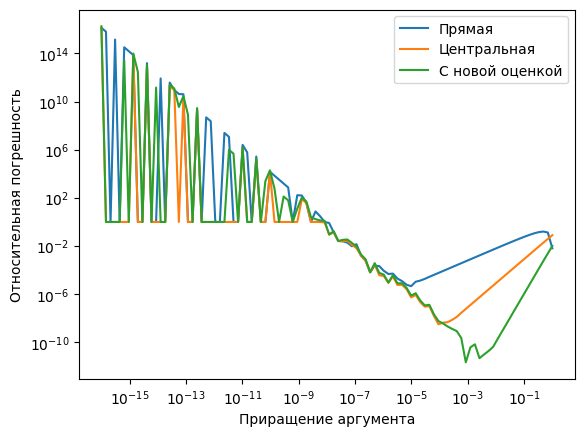

In [36]:
def f(x): return np.sin(x) # Функция
def d2fdx2(x): return -np.sin(x) # и ее производная.

x0 = 1 # Точка, в которой производится дифференциирование.
dx = np.logspace(-16, 0, 100) # Приращения аргумента.

def experiment(method, name, f=np.sin, df2dx2=np.sin, x0=1, dx = np.logspace(-16, 0, 100)):
    approx_d2fdx2 = method(f, x0, dx) # Оценка производных.
    exact_d2fdx2 = -df2dx2(x0) # Точное значение производной.
    relative_error = np.abs(1.0-approx_d2fdx2/exact_d2fdx2) # Относительные погрешности.

    plt.loglog(dx, relative_error, label=name)
    plt.xlabel("Приращение аргумента")
    plt.ylabel("Относительная погрешность")
    return relative_error

def forward_divided_difference(f, x0, dx):
    return (f(x0+2*dx)-2*f(x0+dx)+f(x0))/dx/dx

def central_divided_difference(f, x0, dx):
    return (f(x0+dx)-2*f(x0)+f(x0-dx))/dx/dx

def new(f, x0, dx):
    return (16*(f(x0+dx)-2*f(x0)+f(x0-dx))-(f(x0+2*dx)-2*f(x0)+f(x0-2*dx)))/dx/dx/12

# Строим график зависимости погрешности от приращения.
experiment(forward_divided_difference, 'Прямая')
experiment(central_divided_difference, 'Центральная')
experiment(new, 'С новой оценкой')
plt.legend()
plt.show()

### Для функции нескольких переменных часто необходимо вычислять частные производные. 
Рассуждения при этом аналогичны анализу функции одной переменной, однако нужно быть аккуратным, отслеживая расположение решеток для функций и их производных.
Ограничимся функцией двух переменных $f(x,y)$, заданной в узлах решетки $f(x_k,y_j)=f_{kj}$.
Для таких функций часто нужно вычислять градиент
$$\mathrm{grad}\, f=(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y})=F,$$
дивергенцию
$$\mathrm{div}\, F=\frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y},$$
и оператор Лапласа
$$\Delta f=\mathrm{div}\,\mathrm{grad}\, f.$$


## Задание

### 16. Используя двухточечную оценку для производных, предъявите оптимальный выбор для решеток, на которых заданы градиент, дивергенция и лапласиан.

Например, если $f$ задана в узлах $(i, j)$, то:
$$
\frac{\partial f}{\partial x} \bigg|_{i+\frac{1}{2},j} \approx \frac{f_{i+1,j} - f_{i,j}}{h}.
$$

Если векторное поле $\mathbf{u} = (u, v)$ задано на смещённых решетках ($u$ на $(i+\frac{1}{2},j)$, $v$ на $(i,j+\frac{1}{2})$), то:
$$
\nabla \cdot \mathbf{u} \bigg|_{i,j} \approx \frac{u_{i+\frac{1}{2},j} - u_{i-\frac{1}{2},j}}{h} + \frac{v_{i,j+\frac{1}{2}} - v_{i,j-\frac{1}{2}}}{h}.
$$

Центральнвя разность второго порядка на основной решетке:
$$
\Delta f \bigg|_{i,j} \approx \frac{f_{i+1,j} - 2f_{i,j} + f_{i-1,j}}{h^2} + \frac{f_{i,j+1} - 2f_{i,j} + f_{i,j-1}}{h^2}.
$$
Смещённые решетки минимизируют погрешности за счет согласования производных с узлами решетки.

Для вычисления градиента и дивергенции важно знать производные по $x$ и $y$ одновременно в точке, поэтому для повышения точности нельзя будет использовать смещенную сетку, так как, сместив по x, мы не сможем вычислить производную по $y$. Тогда лучше использовать прямоугольную сетку вдоль осей $x$ и $$ с оптимальными шагами для вычисления центральной разности по $x$ и $y$ соответственно.
Для вычисления лапласиана $\Delta f(x,y) = \dfrac{ \partial^2 f}{\partial x^2} + \dfrac{ \partial^2 f}{\partial y^2}$ проще пользоваться выражением через 3 точки на той же сетке, что и для градиента и дивергенции.